In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df= pd.read_csv(r"C:\Users\ASUS\Desktop\Machine Learning\Advance ML\rfm_data.csv")
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
df.describe(include="all")

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
count,1000.000000,1000,1000.00000,1000,1000.000000,1000
unique,NaN,61,NaN,4,NaN,4
top,NaN,2023-05-04,NaN,Product C,NaN,Tokyo
freq,NaN,27,NaN,277,NaN,278
mean,5554.789000,NaN,513.67781,NaN,554071.398000,NaN
std,2605.014863,NaN,286.09870,NaN,264695.448814,NaN
min,1011.000000,NaN,12.13000,NaN,100096.000000,NaN
25%,3273.000000,NaN,257.12000,NaN,313152.000000,NaN
50%,5538.000000,NaN,523.56500,NaN,564671.500000,NaN
75%,7821.750000,NaN,759.86000,NaN,783052.250000,NaN


In [5]:
df.shape

(1000, 6)

In [6]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [7]:
df.nunique()

CustomerID             946
PurchaseDate            61
TransactionAmount      997
ProductInformation       4
OrderID               1000
Location                 4
dtype: int64

In [8]:
df['PurchaseDate'].min(),df['PurchaseDate'].max()

('2023-04-11', '2023-06-10')

# Create recency

In [9]:
from datetime import datetime

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], format='%Y-%m-%d')

In [10]:
df_recency = df.groupby(by='CustomerID',as_index=False)['PurchaseDate'].max()

df_recency.columns=['CustomerID','PurchaseDate']
recent_date=df_recency['PurchaseDate'].max()

df_recency['Recency']=df_recency['PurchaseDate'].apply(lambda x: (recent_date-x).days)

df_recency.head(20)

,CustomerID,PurchaseDate,Recency
0,1011,2023-05-08,33
1,1025,2023-05-20,21
2,1029,2023-06-10,0
3,1046,2023-04-28,43
4,1049,2023-05-28,13
5,1082,2023-05-17,24
6,1086,2023-06-01,9
7,1104,2023-05-07,34
8,1108,2023-05-13,28
9,1120,2023-05-13,28


In [11]:
df_recency["PurchaseDate"].max()

Timestamp('2023-06-10 00:00:00')

# Create Frequency

In [27]:
frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'],as_index= False)['OrderID'].count()
frequency_df.columns = ["CustomerID","Frequency"]
frequency_df.head(10)
# Here order id is best use orderid not purchase date 

,CustomerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
5,1082,1
6,1086,1
7,1104,1
8,1108,1
9,1120,1


# Create Monetary

In [13]:

#df['TransactionAmount']=df['Sales']*df["Quantity"]
monetary_df = df.groupby(
    by='CustomerID',as_index= False)['TransactionAmount'].sum()
monetary_df.columns = ["CustomerID","Monetary"]
monetary_df.head(10)


,CustomerID,Monetary
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72
5,1082,600.69
6,1086,100.18
7,1104,146.12
8,1108,883.21
9,1120,999.44


In [14]:
rf_df= df_recency.merge(frequency_df,on='CustomerID')
rfm_df = rf_df.merge(monetary_df,on='CustomerID').drop(columns ='PurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,1011,33,2,1129.02
1,1025,21,1,359.29
2,1029,0,1,704.99
3,1046,43,1,859.82
4,1049,13,1,225.72


In [15]:
rfm_df['R_rank']=rfm_df['Recency'].rank(ascending= False )
rfm_df['F_rank']=rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank']=rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1011,33,2,1129.02,47.331910,97.301587,97.885835
1,1025,21,1,359.29,64.727855,47.407407,32.135307
2,1029,0,1,704.99,100.000000,47.407407,66.807611
3,1046,43,1,859.82,27.908218,47.407407,83.298097
4,1049,13,1,225.72,78.762006,47.407407,21.247357


In [16]:
rfm_df['RFM_Score']=0.2*rfm_df['R_rank_norm']+0.2 *\
rfm_df['F_rank_norm']+0.6*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *=0.05
rfm_df = rfm_df.round(2)
rfm_df[["CustomerID",'RFM_Score']].head(7)


,CustomerID,RFM_Score
0,1011,4.38
1,1025,2.09
2,1029,3.48
3,1046,3.25
4,1049,1.90
5,1082,2.73
6,1086,1.57


In [17]:
rfm_df['RFM_Score'].sort_values(ascending=False)

39     4.91
27     4.88
74     4.86
472    4.86
113    4.82
       ... 
362    0.64
334    0.63
944    0.59
470    0.52
835    0.51
Name: RFM_Score, Length: 946, dtype: float64

In [18]:
rfm_df["RFM_Score"].describe()

count    946.000000
mean       2.508097
std        0.961802
min        0.510000
25%        1.750000
50%        2.470000
75%        3.260000
max        4.910000
Name: RFM_Score, dtype: float64

In [19]:
rfm_df["Customer_segment"]=np.where(rfm_df['RFM_Score']>4.5,
                                   'Top Customers',
                                   (np.where(
                                       rfm_df["RFM_Score"]>4,
                                       "High Value Customer",
                                       (np.where(
                                           rfm_df["RFM_Score"]>3,
                                           "Medium Value Customer",
                                           np.where(rfm_df["RFM_Score"]>1.5,
                                                   'Low Value Customers','Lost Customers')
                                       ))
                                   )))
rfm_df[['CustomerID','RFM_Score',"Customer_segment"]].head(20)

,CustomerID,RFM_Score,Customer_segment
0,1011,4.38,High Value Customer
1,1025,2.09,Low Value Customers
2,1029,3.48,Medium Value Customer
3,1046,3.25,Medium Value Customer
4,1049,1.90,Low Value Customers
5,1082,2.73,Low Value Customers
6,1086,1.57,Low Value Customers
7,1104,1.33,Lost Customers
8,1108,3.58,Medium Value Customer
9,1120,3.93,Medium Value Customer


In [20]:
rfm_df.Customer_segment.value_counts()

Customer_segment
Low Value Customers      472
Medium Value Customer    258
Lost Customers           161
High Value Customer       36
Top Customers             19
Name: count, dtype: int64

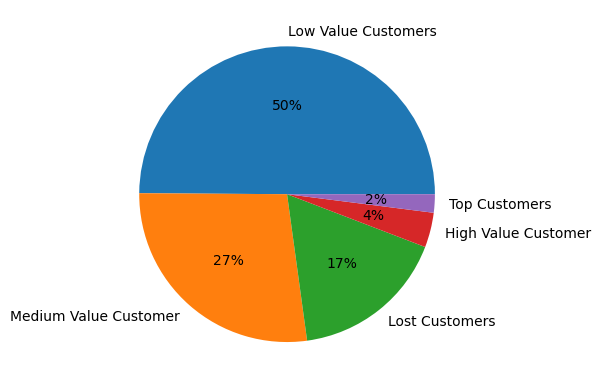

In [21]:
plt.pie(rfm_df.Customer_segment.value_counts(),
       labels=rfm_df.Customer_segment.value_counts().index,
       autopct='%.0f%%')
plt.show()

In [22]:
!pip install squarify


In [23]:
import squarify

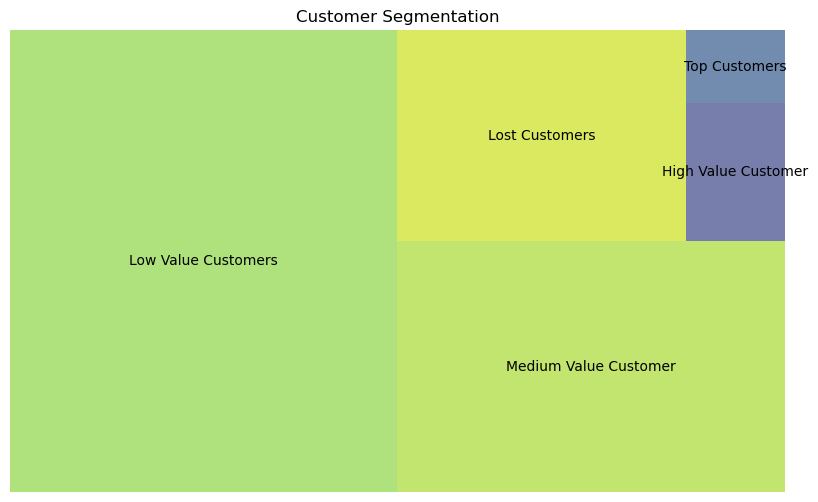

In [24]:
import squarify
import matplotlib.pyplot as plt

# Assuming rfm_df is your DataFrame containing customer segment information
plt.figure(figsize=(10, 6))  # Set plot size

# Plot the treemap
squarify.plot(sizes=rfm_df['Customer_segment'].value_counts(), 
              label=rfm_df['Customer_segment'].value_counts().index,
              alpha=0.7)


plt.axis('off')  # Turn off axis
plt.title('Customer Segmentation')  # Add title
plt.show()  # Show the plot
